### Basic 

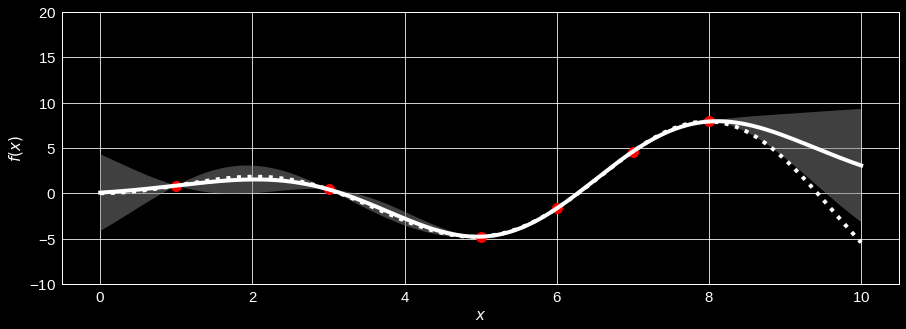

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats.qmc import Sobol
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

def f(x):
    """Simple function to model"""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction, and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Set the background to pure black
plt.style.use('dark_background')
fig = plt.figure(figsize=(15, 5), facecolor='black')

# Make the actual function white
plt.plot(x, f(x), 'w:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'ro', markersize=10, label='Observations', color='red')  # Observation points in red
plt.plot(x, y_pred, 'w-', label='Prediction', color='white')  # Prediction line in white

# Make the confidence interval gray
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='gray', ec='None', label='95% confidence interval')

plt.xlabel('$x$', color='white')
plt.ylabel('$f(x)$', color='white')
plt.ylim(-10, 20)

# Set the axis labels and legend text to white
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

plt.show()


### Advanced 

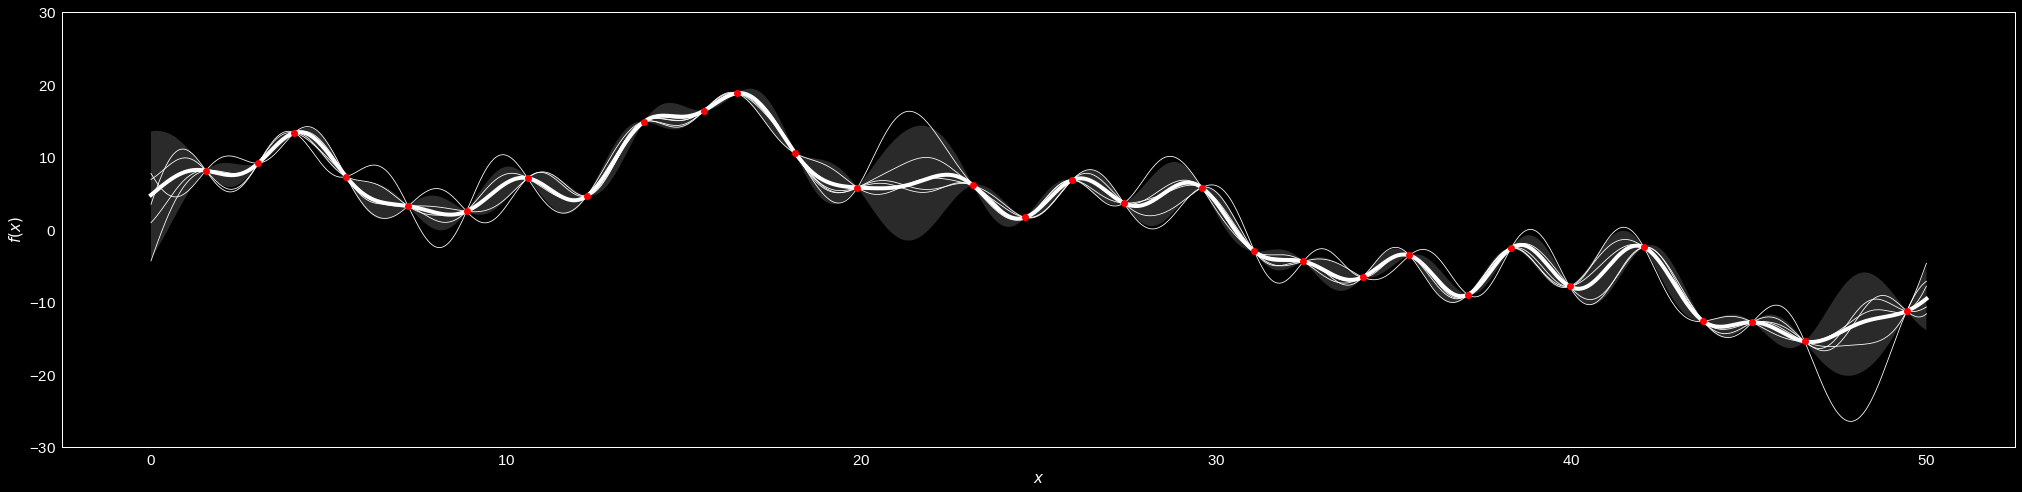

In [2]:
np.random.seed(1)

def f(x):
    """Complicated function to model"""
    return 10 * np.sin(0.1 * x) + 5 * np.sin(0.5 * x) + 2 * np.sin(2.0 * x) + 3 * np.sin(5.0 * x)


# Generate Sobol sequence samples
sobol = Sobol(d=1)
sobol_samples = sobol.random(30) * 50.0

# Sort the samples for better visualization
sobol_samples.sort(axis=0)

# Observations
y = f(sobol_samples).ravel()

# Mesh the input space for evaluations of the real function, the prediction, and its MSE
x = np.atleast_2d(np.linspace(0, 50, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(sobol_samples, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Generate 5 random samples from the posterior GP
samples = gp.sample_y(x, n_samples=5, random_state=1)

# Set the background to pure black
plt.style.use('dark_background')
fig = plt.figure(figsize=(35, 8), facecolor='black')

# Make the confidence interval a slightly lighter shade of gray
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.300 * sigma,
                        (y_pred + 1.300 * sigma)[::-1]]),
         alpha=.2, fc='lightgray', ec='None', label='95% confidence interval')

# Add 5 random samples as thin white lines
for i in range(5):
    plt.plot(x, samples[:, i], 'w-', linewidth=0.8, alpha=1.0, label=f'Sample {i + 1}', color='white')

# Make the mean line a darker shade of gray
plt.plot(x, y_pred, 'k-', label='Prediction', color='white')

# Make the observations white crosses
plt.plot(sobol_samples, y, '.', markersize=10, label='Observations', color='red', markeredgewidth=2)

# plt.plot(x, f(x), 'w:', label=r'$f(x) = 25\cdot(\sin(0.2\cdot x) + 1)$', color='cyan')  # Modified function

plt.xlabel('$x$', color='white')
plt.ylabel('$f(x)$', color='white')
plt.ylim(-20, 20)  # Adjust the y-axis limit as needed

# Set the axis labels and legend text to white
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

plt.ylim(-30, 30)

# Turn off grid lines
plt.grid(False)

# Add a legend
# plt.legend()

plt.show()


### Advanced Minimalist 

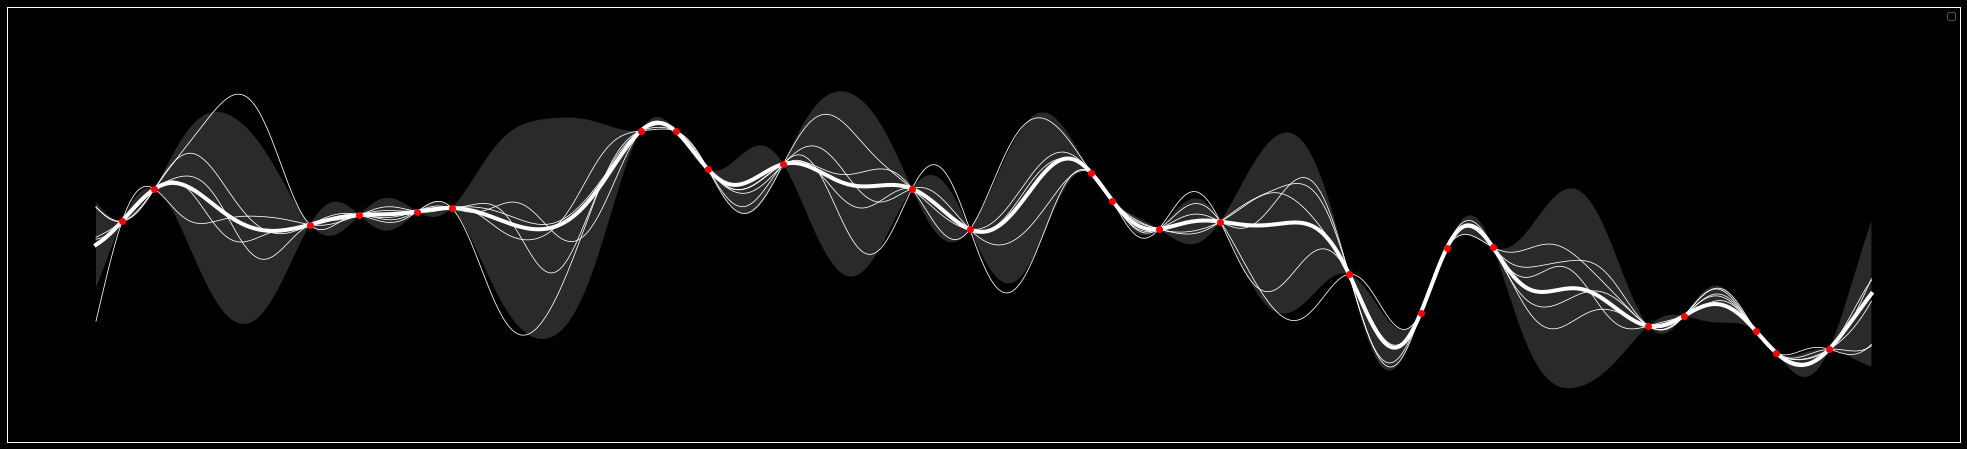

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats.qmc import Sobol

np.random.seed(1)

def f(x):
    """The modified complex and wiggly function to predict."""
    return 10 * np.sin(0.1 * x) + 5 * np.sin(0.5 * x) + 2 * np.sin(2.0 * x) + 3 * np.sin(5.0 * x)

# ----------------------------------------------------------------------
#  First the noiseless case
# Generate Sobol sequence samples
sobol = Sobol(d=1)
sobol_samples = sobol.random(25) * 50.0

# Sort the samples for better visualization
sobol_samples.sort(axis=0)

# Observations
y = f(sobol_samples).ravel()

# Mesh the input space for evaluations of the real function, the prediction, and its MSE
x = np.atleast_2d(np.linspace(0, 50, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(sobol_samples, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Generate 5 random samples from the posterior GP
samples = gp.sample_y(x, n_samples=5, random_state=1)

# Set the background to pure black
plt.style.use('dark_background')
fig = plt.figure(figsize=(35, 8), facecolor='black')

# Make the confidence interval a slightly lighter shade of gray
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.960 * sigma,
                        (y_pred + 1.960 * sigma)[::-1]]),
         alpha=.2, fc='lightgray', ec='None')

# Add 5 random samples as thin white lines
for i in range(5):
    plt.plot(x, samples[:, i], 'w-', linewidth=0.8, alpha=1.0, color='white')

# Make the mean line a darker shade of gray
plt.plot(x, y_pred, 'k-', color='white')

# Make the observations white crosses
plt.plot(sobol_samples, y, '.', markersize=10, color='red', markeredgewidth=2)

plt.ylim(-30, 35)

# Turn off grid lines
plt.grid(False)

# Remove labels, ticks, and legend
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.legend([])

 
plt.savefig('gp_wallpaper.png')
plt.show()
